##### Topic: Wine Quality

##### About Dataset
The dataset contains a total of 32485 wine instances with which the quality and the type of wines can be predicted by analyzing the ingredients or the wine compounds. The data contains 10 wine features or ingredients based upon which the quality or the types of wine can be predicted. The quality classes present the data:
- Quality-6 => 14117 instances
- Quality-5 => 10755 instances
- Quality-7 => 5371 instances
- Quality-4 => 1144 instances
- Quality-8 => 941 instances
- Quality-3 => 133 instances
- Quality-9 => 24 instances

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df=pd.read_csv('WineQuality.csv')
df.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2732            7.4             0.170         0.29             1.4   
1        2607            5.3             0.310         0.38            10.5   
2        1653            4.7             0.145         0.29             1.0   
3        3264            6.9             0.260         0.29             4.2   
4        4931            6.4             0.450         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                 23.0                 107.0  0.99390  3.52   
1      0.031                 53.0                 140.0  0.99321  3.34   
2      0.042                 35.0                  90.0  0.99080  3.76   
3      0.043                 33.0                 114.0  0.99020  3.16   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality        Type  
0       0.65     10.4        6  White Wine  
1       0.46     11.7        6  White Wine  
2       0.49     11.3        6  White Wine  
3       0.31     12.5        6  White Wine  
4       0.28     10.8        5  White Wine

In [3]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

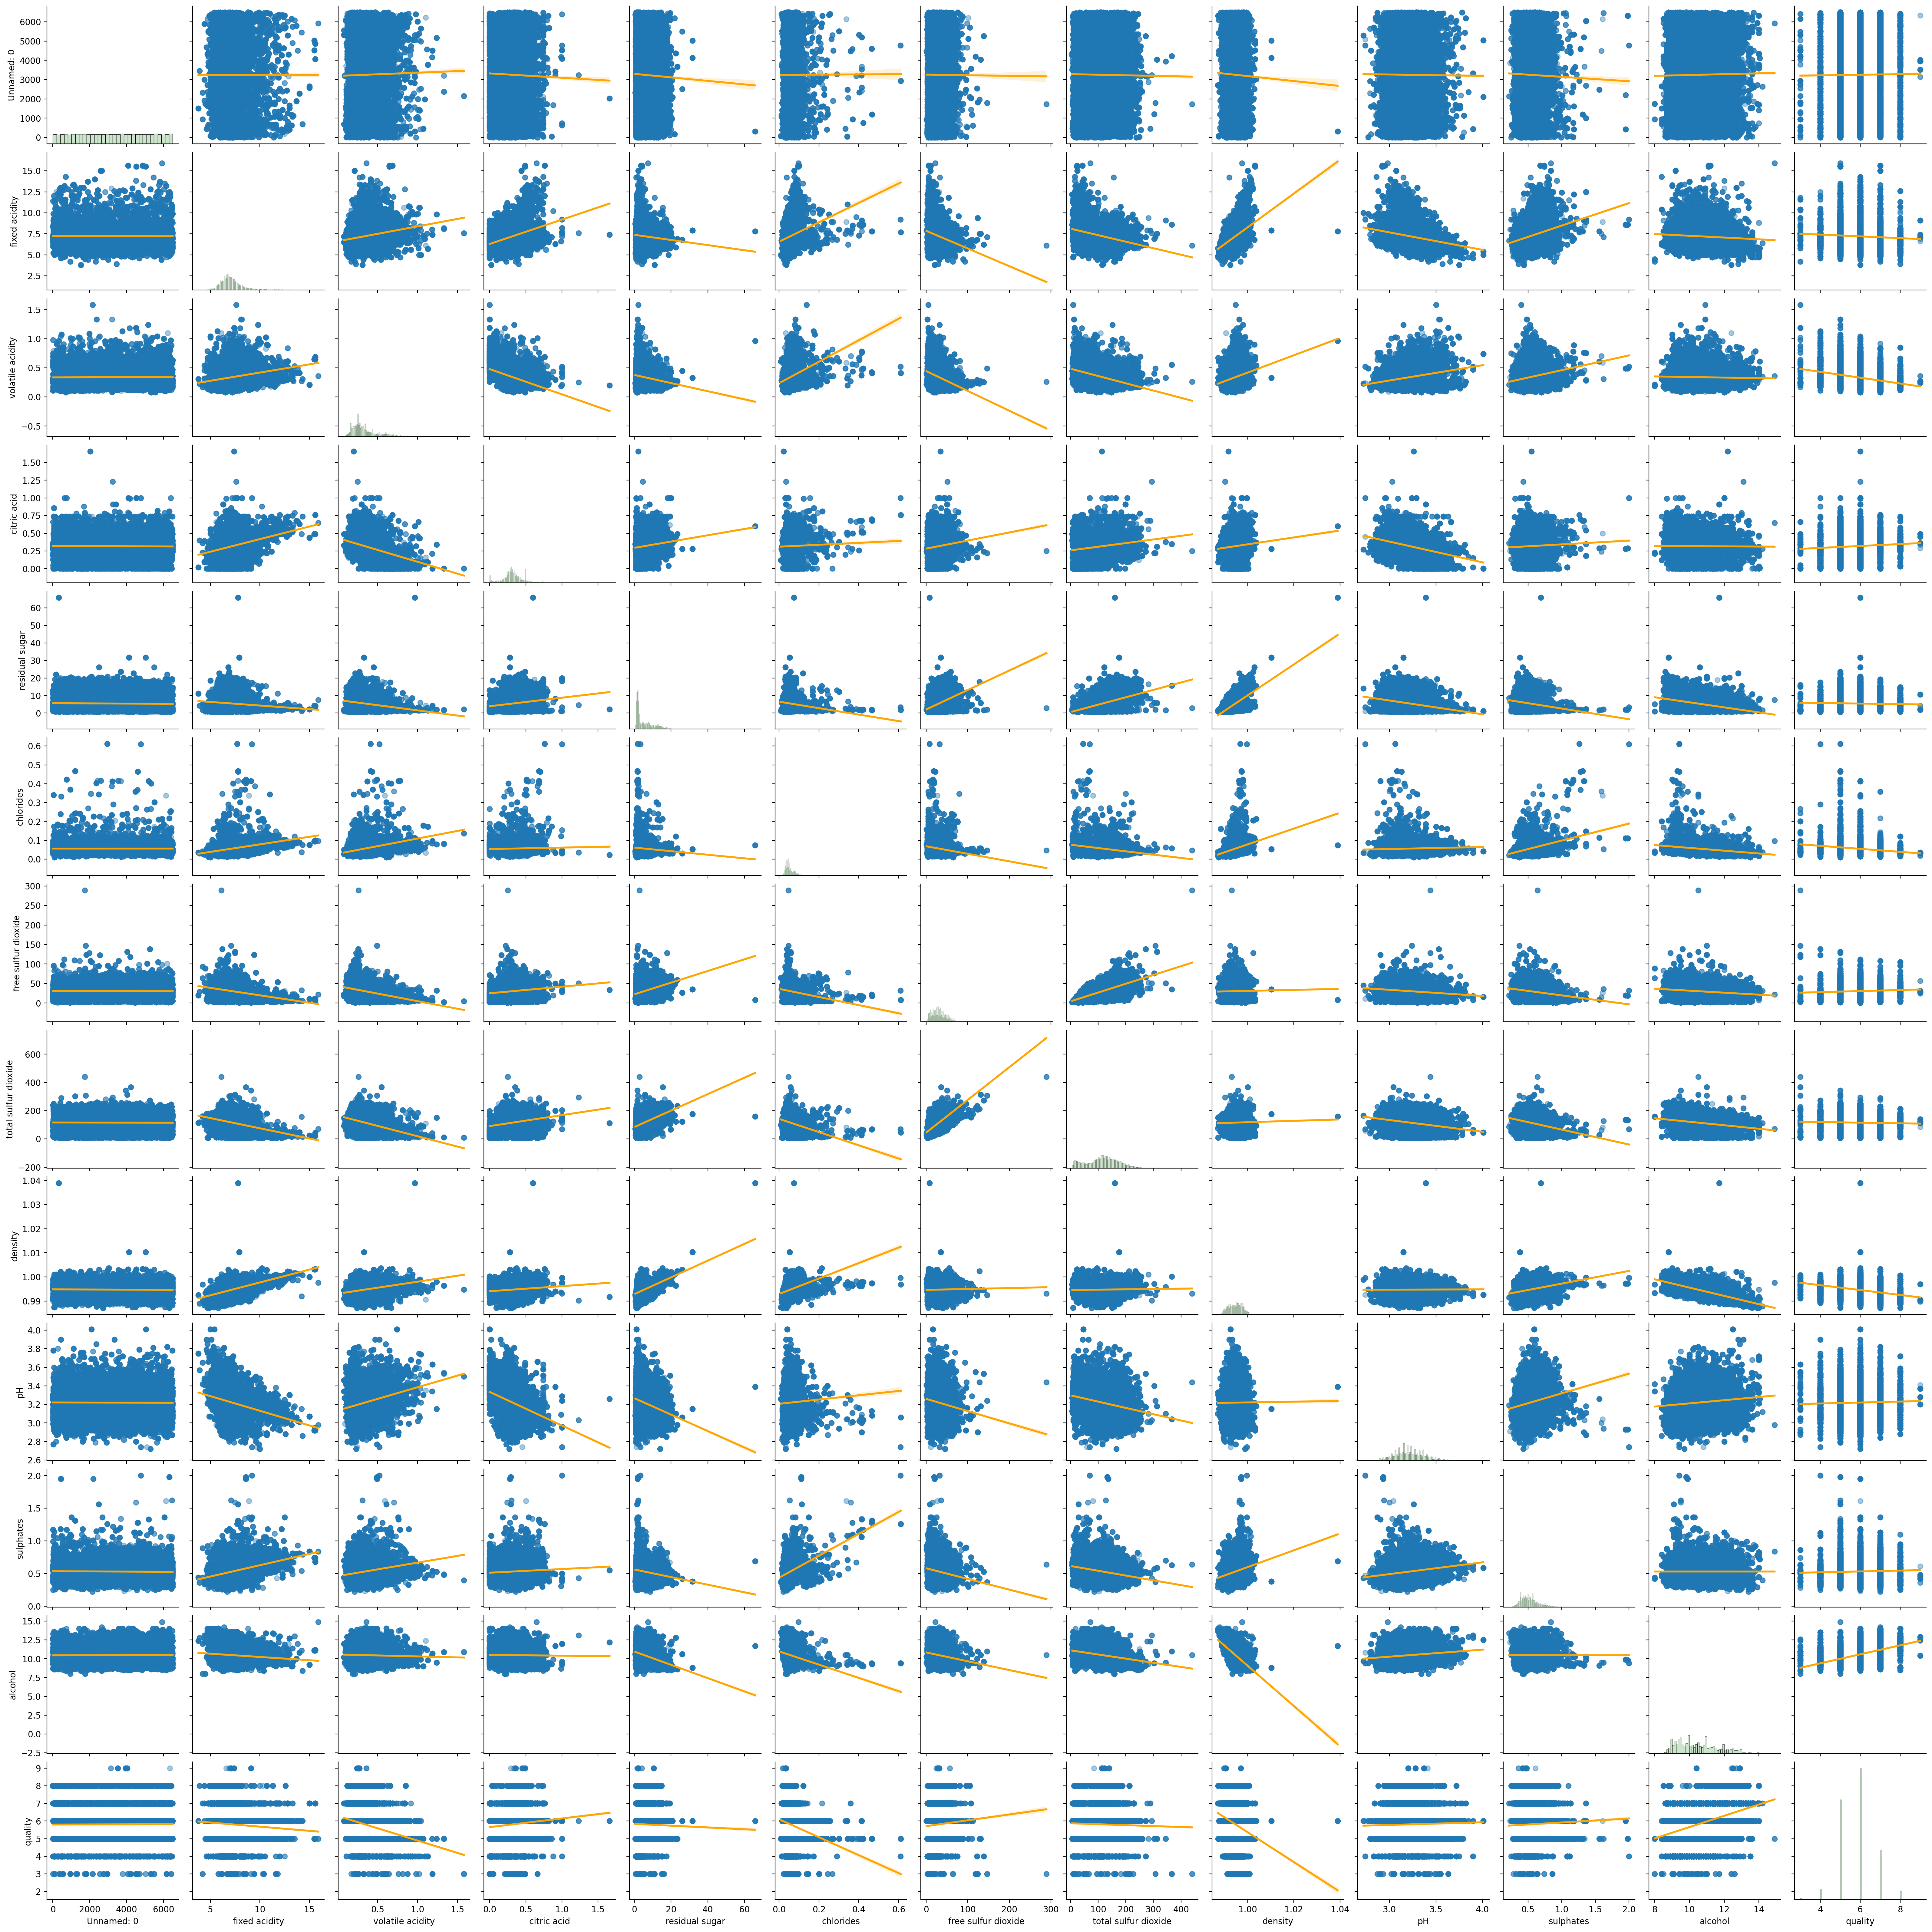

In [29]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
             'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2}
             )

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [6]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.1


In [7]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Type'],
      dtype='object')

In [8]:
# model= DecisionTreeClassifier(random_state=7)
model = RandomForestClassifier(n_estimators=250, random_state=7)
# model = ExtraTreesClassifier(n_estimators=250, random_state=7)
X = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
       ]]
y=df['quality']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [9]:
model.feature_importances_

array([0.07520009, 0.10017496, 0.0799488 , 0.08577374, 0.08732839,
       0.08789346, 0.09008357, 0.10033891, 0.08541802, 0.08718869,
       0.12065135])

In [10]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

fixed acidity           0.075200
citric acid             0.079949
pH                      0.085418
residual sugar          0.085774
sulphates               0.087189
chlorides               0.087328
free sulfur dioxide     0.087893
total sulfur dioxide    0.090084
volatile acidity        0.100175
density                 0.100339
alcohol                 0.120651
dtype: float64

In [11]:
fs.sum()

1.0

<Axes: >

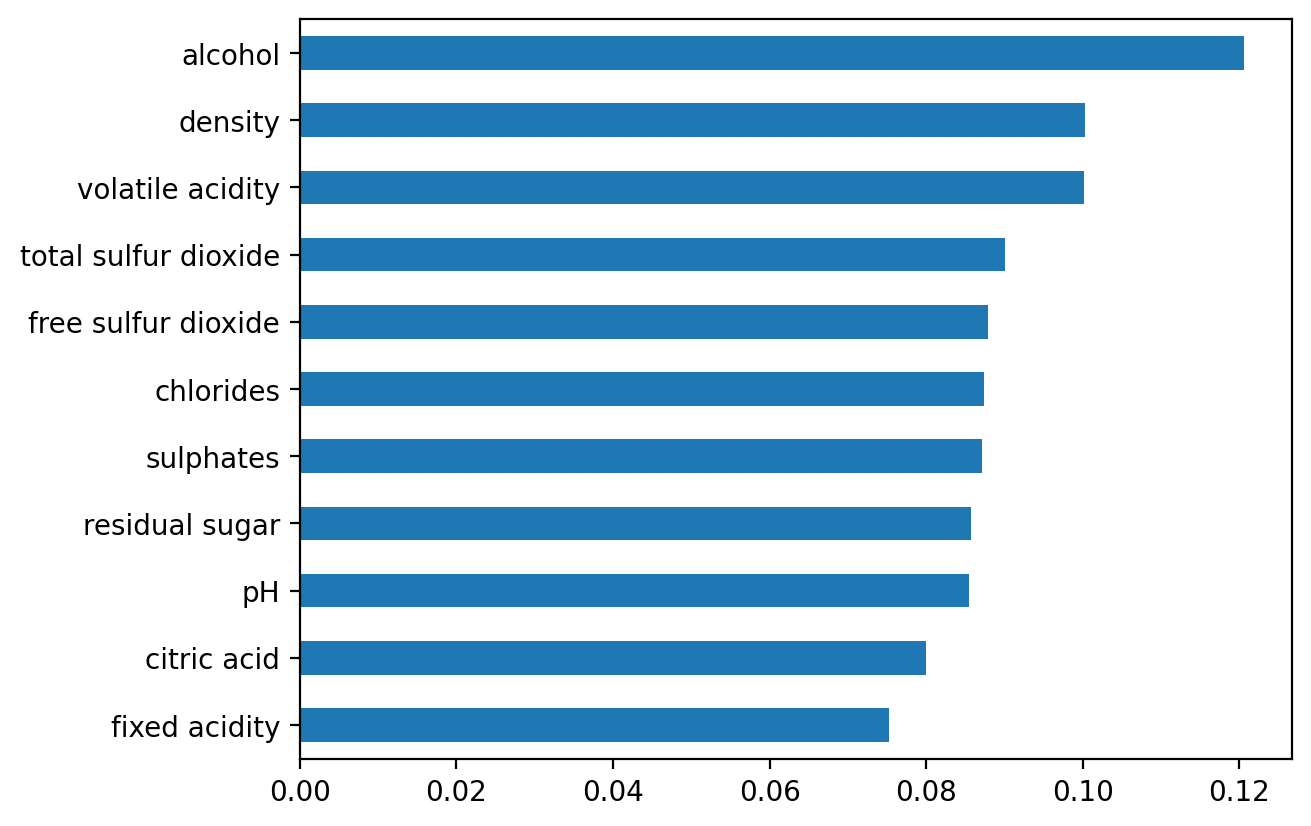

In [12]:
fs.plot(kind='barh')

In [13]:
fs[fs>=.087328]

chlorides               0.087328
free sulfur dioxide     0.087893
total sulfur dioxide    0.090084
volatile acidity        0.100175
density                 0.100339
alcohol                 0.120651
dtype: float64

In [14]:
fs.nlargest(6) #.index

alcohol                 0.120651
density                 0.100339
volatile acidity        0.100175
total sulfur dioxide    0.090084
free sulfur dioxide     0.087893
chlorides               0.087328
dtype: float64

In [15]:
fs[fs>=.087328].index

Index(['chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'volatile acidity', 'density', 'alcohol'],
      dtype='object')

##### Select Feature Important 6 Columns

In [16]:
X=df[fs[fs > .087328].index]
X.head()

chlorides  free sulfur dioxide  total sulfur dioxide  volatile acidity  \
0      0.047                 23.0                 107.0             0.170   
1      0.031                 53.0                 140.0             0.310   
2      0.042                 35.0                  90.0             0.145   
3      0.043                 33.0                 114.0             0.260   
4      0.030                 10.0                 131.0             0.450   

   density  alcohol  
0  0.99390     10.4  
1  0.99321     11.7  
2  0.99080     11.3  
3  0.99020     12.5  
4  0.99050     10.8

In [17]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [18]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    # [SVC(kernel='linear'), 'SVC_linear'],
    # [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.8774
[[  23    0   10    3    1    3    0]
 [   5  261   39   24   13    1    0]
 [   9   40 2823  280   61   14    0]
 [   3   28  263 3790  132   19    0]
 [   0    9   42  152 1404    5    0]
 [   0    0    5   26    8  243    0]
 [   0    0    0    0    0    0    7]]
              precision    recall  f1-score   support

           3       0.57      0.57      0.57        40
           4       0.77      0.76      0.77       343
           5       0.89      0.87      0.88      3227
           6       0.89      0.89      0.89      4235
           7       0.87      0.87      0.87      1612
           8       0.85      0.86      0.86       282
           9       1.00      1.00      1.00         7

    accuracy                           0.88      9746
   macro avg       0.83      0.83      0.83      9746
weighted avg       0.88      0.88      0.88      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

LogisticRegression   score: 0.4538
[[   1    0    8   31    0    0    0]
 [   0    0   97  246    0    0    0]
 [   2    0  647 2578    0    0    0]
 [   0    0  460 3775    0    0    0]
 [   0    0   85 1527    0    0    0]
 [   0    0    0  282    0    0    0]
 [   0    0    0    7    0    0    0]]
              precision    recall  f1-score   support

           3       0.33      0.03      0.05        40
           4       0.00      0.00      0.00       343
           5       0.50      0.20      0.29      3227
           6       0.45      0.89      0.60      4235
           7       0.00      0.00      0.00      1612
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00         7

    accuracy                           0.45      9746
   macro avg       0.18      0.16      0.13      9746
weighted avg       0.36      0.45      0.35      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier score: 0.6567
[[  26    0    2   12    0    0    0]
 [   3   95  133  112    0    0    0]
 [   1    6 2165 1017   38    0    0]
 [   3    9  732 3323  162    4    2]
 [   0    0   48  864  691    9    0]
 [   0    0    4  113   72   93    0]
 [   0    0    0    0    0    0    7]]
              precision    recall  f1-score   support

           3       0.79      0.65      0.71        40
           4       0.86      0.28      0.42       343
           5       0.70      0.67      0.69      3227
           6       0.61      0.78      0.69      4235
           7       0.72      0.43      0.54      1612
           8       0.88      0.33      0.48       282
           9       0.78      1.00      0.88         7

    accuracy                           0.66      9746
   macro avg       0.76      0.59      0.63      9746
weighted avg       0.68      0.66      0.65      9746

-----------------------------------------------------------------------------------------------

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

MLPClassifier        score: 0.5402
[[   4    4   15   17    0    0    0]
 [   0   12  213  114    4    0    0]
 [   5    6 1988 1200   28    0    0]
 [  13    0 1052 2863  307    0    0]
 [   0    3   96 1115  395    3    0]
 [   0    2   27  140  110    3    0]
 [   0    0    0    4    3    0    0]]
              precision    recall  f1-score   support

           3       0.18      0.10      0.13        40
           4       0.44      0.03      0.06       343
           5       0.59      0.62      0.60      3227
           6       0.53      0.68      0.59      4235
           7       0.47      0.25      0.32      1612
           8       0.50      0.01      0.02       282
           9       0.00      0.00      0.00         7

    accuracy                           0.54      9746
   macro avg       0.39      0.24      0.25      9746
weighted avg       0.53      0.54      0.51      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
sorted_array_by_rows = sorted(model_scores, key=lambda x: x[0], reverse=True)
sorted_array_by_rows

[[0.9916888980094398, 'RandomForestClassifier'],
 [0.9879950749025241, 'BaggingClassifier'],
 [0.942027498460907, 'DecisionTreeClassifier'],
 [0.877385594089883, 'KNeighborsClassifier'],
 [0.6566796634516725, 'GradientBoostingClassifier'],
 [0.5402216293864149, 'MLPClassifier'],
 [0.47332238867227583, 'GaussianNB'],
 [0.4538272111635543, 'LogisticRegression'],
 [0.36199466447773443, 'AdaBoostClassifier'],
 [0.2089062179355633, 'Perceptron']]

##### Select Feature Important 3 Columns

In [20]:
X2=df[fs[fs > .1].index]
X2.head()

volatile acidity  density  alcohol
0             0.170  0.99390     10.4
1             0.310  0.99321     11.7
2             0.145  0.99080     11.3
3             0.260  0.99020     12.5
4             0.450  0.99050     10.8

In [21]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [22]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    # [SVC(kernel='linear'), 'SVC_linear'],
    # [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.8820
[[  28    1    1    4    3    3    0]
 [   0  254   41   30   18    0    0]
 [   5   21 2875  267   53    6    0]
 [   0   22  237 3792  171   13    0]
 [   1   10   46  136 1401   18    0]
 [   0    1    6   15   21  239    0]
 [   0    0    0    0    0    0    7]]
              precision    recall  f1-score   support

           3       0.82      0.70      0.76        40
           4       0.82      0.74      0.78       343
           5       0.90      0.89      0.89      3227
           6       0.89      0.90      0.89      4235
           7       0.84      0.87      0.85      1612
           8       0.86      0.85      0.85       282
           9       1.00      1.00      1.00         7

    accuracy                           0.88      9746
   macro avg       0.88      0.85      0.86      9746
weighted avg       0.88      0.88      0.88      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

LogisticRegression   score: 0.5163
[[   0    2   18   20    0    0    0]
 [   0    1  185  155    2    0    0]
 [   0    4 1917 1289   17    0    0]
 [   0    0 1152 2876  207    0    0]
 [   0    0  157 1217  238    0    0]
 [   0    0   29  198   55    0    0]
 [   0    0    0    2    5    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        40
           4       0.14      0.00      0.01       343
           5       0.55      0.59      0.57      3227
           6       0.50      0.68      0.58      4235
           7       0.45      0.15      0.22      1612
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00         7

    accuracy                           0.52      9746
   macro avg       0.24      0.20      0.20      9746
weighted avg       0.48      0.52      0.48      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

MLPClassifier        score: 0.5367
[[   0    2   19   19    0    0    0]
 [   0    0  204  131    8    0    0]
 [   0    0 2048 1160   19    0    0]
 [   0    0 1143 2938  154    0    0]
 [   0    0  103 1264  245    0    0]
 [   0    0    1  221   60    0    0]
 [   0    0    0    4    3    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       343
           5       0.58      0.63      0.61      3227
           6       0.51      0.69      0.59      4235
           7       0.50      0.15      0.23      1612
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00         7

    accuracy                           0.54      9746
   macro avg       0.23      0.21      0.20      9746
weighted avg       0.50      0.54      0.50      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
sorted_array_by_rows = sorted(model_scores, key=lambda x: x[0], reverse=True)
sorted_array_by_rows

[[0.9847116765852657, 'RandomForestClassifier'],
 [0.9813256720705931, 'BaggingClassifier'],
 [0.9122717012107532, 'DecisionTreeClassifier'],
 [0.8820028729735276, 'KNeighborsClassifier'],
 [0.6155345782885286, 'GradientBoostingClassifier'],
 [0.5367330186743279, 'MLPClassifier'],
 [0.5163143853888775, 'LogisticRegression'],
 [0.49456187153704084, 'Perceptron'],
 [0.49076544223271085, 'GaussianNB'],
 [0.2558998563513236, 'AdaBoostClassifier']]

##### Select Feature Important All Columns

In [25]:
X3=df[fs[fs > .07].index]
X3.head()

fixed acidity  citric acid    pH  residual sugar  sulphates  chlorides  \
0            7.4         0.29  3.52             1.4       0.65      0.047   
1            5.3         0.38  3.34            10.5       0.46      0.031   
2            4.7         0.29  3.76             1.0       0.49      0.042   
3            6.9         0.29  3.16             4.2       0.31      0.043   
4            6.4         0.07  2.97             1.1       0.28      0.030   

   free sulfur dioxide  total sulfur dioxide  volatile acidity  density  \
0                 23.0                 107.0             0.170  0.99390   
1                 53.0                 140.0             0.310  0.99321   
2                 35.0                  90.0             0.145  0.99080   
3                 33.0                 114.0             0.260  0.99020   
4                 10.0                 131.0             0.450  0.99050   

   alcohol  
0     10.4  
1     11.7  
2     11.3  
3     12.5  
4     10.8

In [26]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X3, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [27]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    # [SVC(kernel='linear'), 'SVC_linear'],
    # [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.8739
[[  23    2    6    6    3    0    0]
 [   3  250   44   42    3    1    0]
 [   9   31 2841  284   57    5    0]
 [   2   35  257 3794  121   23    3]
 [   0    6   53  185 1361    7    0]
 [   0    0    9   24    8  241    0]
 [   0    0    0    0    0    0    7]]
              precision    recall  f1-score   support

           3       0.62      0.57      0.60        40
           4       0.77      0.73      0.75       343
           5       0.89      0.88      0.88      3227
           6       0.88      0.90      0.89      4235
           7       0.88      0.84      0.86      1612
           8       0.87      0.85      0.86       282
           9       0.70      1.00      0.82         7

    accuracy                           0.87      9746
   macro avg       0.80      0.83      0.81      9746
weighted avg       0.87      0.87      0.87      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

LogisticRegression   score: 0.4599
[[   0    0   17   22    0    1    0]
 [   0    0  132  208    3    0    0]
 [   0    0 1324 1897    6    0    0]
 [   0    0 1070 3146   19    0    0]
 [   0    0  204 1396   12    0    0]
 [   0    0   35  243    4    0    0]
 [   0    0    2    5    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       343
           5       0.48      0.41      0.44      3227
           6       0.45      0.74      0.56      4235
           7       0.27      0.01      0.01      1612
           8       0.00      0.00      0.00       282
           9       0.00      0.00      0.00         7

    accuracy                           0.46      9746
   macro avg       0.17      0.17      0.15      9746
weighted avg       0.40      0.46      0.39      9746

----------------------------------------------------------------------------------------------------


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
sorted_array_by_rows = sorted(model_scores, key=lambda x: x[0], reverse=True)
sorted_array_by_rows

[[0.993022778575826, 'RandomForestClassifier'],
 [0.9887133182844243, 'BaggingClassifier'],
 [0.9514672686230248, 'DecisionTreeClassifier'],
 [0.873896983377796, 'KNeighborsClassifier'],
 [0.6812025446336959, 'GradientBoostingClassifier'],
 [0.5425815719269443, 'MLPClassifier'],
 [0.4625487379437718, 'GaussianNB'],
 [0.4598809768109994, 'LogisticRegression'],
 [0.3859019084752719, 'Perceptron'],
 [0.14323825159039605, 'AdaBoostClassifier']]